In [1]:
import numpy as np
import pylab as p
from math import log
import numpy.fft as npf
def dft(y):
    N = len(y)
    c = np.zeros(N,complex)
    for k in range(N//2 + 1):
        for n in range(N):
            c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)
    return c
            

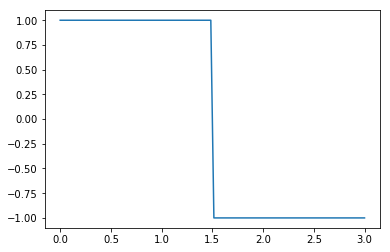

In [3]:
N = 100
x = np.linspace(0,3,N)
y = np.ones(N)
for i in range(N//2,N):
    y[i] *= -1
p.plot(x,y)
p.show()

In [ ]:
N = 100
x = np.linspace(0,3,N)
y = np.ones(N)
for i in range(N//2,N):
    y[i] *= -1
p.plot(x,y)
p.show()

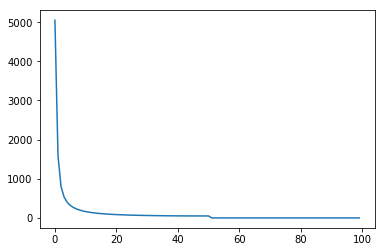

In [17]:
y = np.arange(1,N+1)
p.plot(np.abs(dft(y)))
p.show()

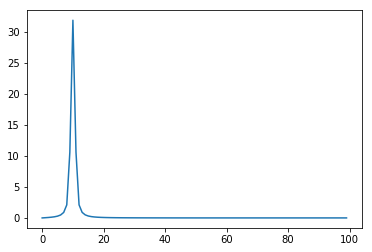

In [18]:
a = np.arange(1,N+1)
y = np.sin(np.pi*a/N)*np.sin(20*np.pi*a/N)
p.plot(np.abs(dft(y)))
p.show()

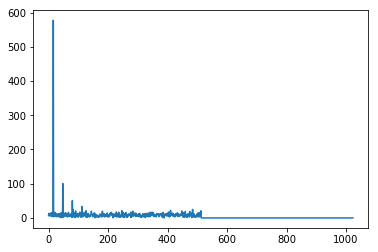

In [6]:
y = np.loadtxt('pitch.txt',float)
p.plot(np.abs(dft(y)))
p.show()

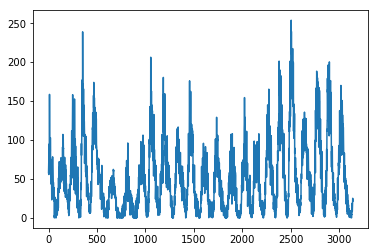

In [228]:
data = np.loadtxt('sunspots.txt',float)
p.plot(data[:,0],data[:,1])
#p.xlim(1150,1400)

p.show()

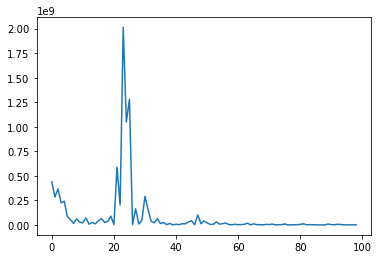

In [229]:
c=dft(data[:,1])[1:100]
p.plot(np.abs(c)**2)
p.show()

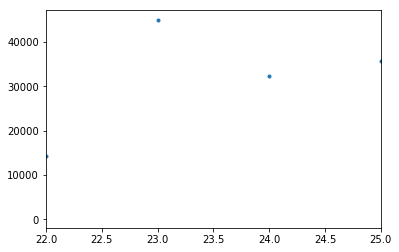

In [230]:
c = fft(data[:,1])[1:100]
p.plot(np.abs(c),'.')
p.xlim(22,25)
p.show()

In [233]:
print('a estimativa do ciclo em meses é: ',np.abs(350-470))
k = np.argmax(np.abs(c))
print(k)
print('a frequência com mais peso é: ', 2*np.pi*k)

a estimativa do ciclo em meses é:  120
23
a frequência com mais peso é:  144.513262065


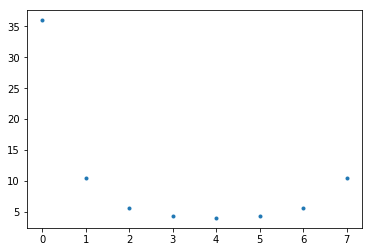

In [10]:
y = np.array([1,2,3,4,5,6,7,8])
p.plot(np.abs(fft(y)),'.')
p.show()

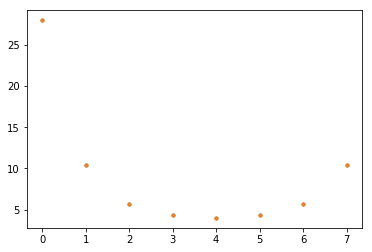

In [11]:
def fft1(y):
    N = len(y)
    c = np.zeros(N,complex)
    for k in range(N):
        a = np.copy(y)
        for m in range(int( log(N,2)) -1 , -1 , -1 ):
            b=np.zeros(2**m,complex)
            for i in range(2**m):
                b[i]= a[i] + np.exp(-2j*np.pi*2**m*k/N)*a[i+2**(m)]
            a = np.copy(b)
        c[k] = np.complex(a)  
    return c

y = np.array([0,1,2,3,4,5,6,7])
p.plot(np.abs(fft1(y)),'.')
p.plot(np.abs(fft(y)),'.')
p.show()
    

# Piano


o tempo de gravação foi:  2.2675736961451247


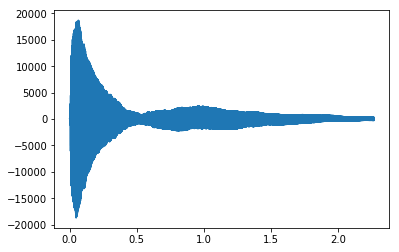

In [98]:
data1 = np.loadtxt('piano.txt',float)
print('o tempo de gravação foi: ',len(data1)/44100)
t = np.linspace(0,len(data)/44100,len(data1))
p.plot(t,data1)
p.show()



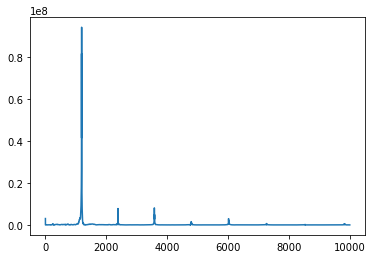

In [100]:
c1 = npf.rfft(data1)
p.plot(np.abs(c1[0:10000]))
p.show()

# Trompete

100000
o tempo de gravação foi:  2.2675736961451247


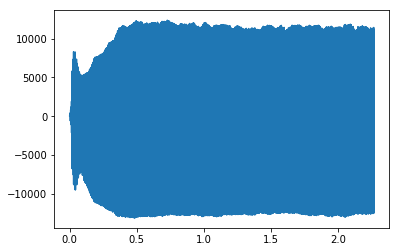

In [81]:
data = np.loadtxt('trumpet.txt',float)
print(len(data))
print('o tempo de gravação foi: ',len(data)/44100)
t = np.linspace(0,len(data)/44100,len(data))
p.plot(t,data)
p.show()

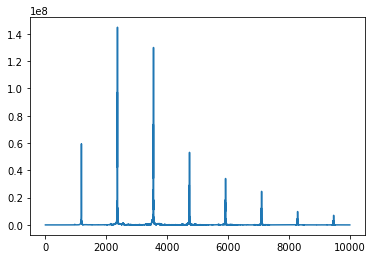

In [101]:
c = npf.rfft(data)
p.plot(np.abs(c[0:10000]))
p.show()


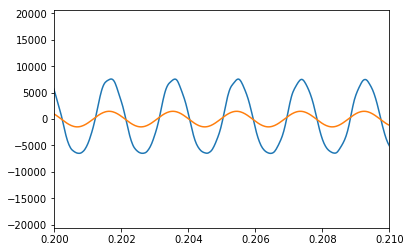

In [237]:
k = np.argmax(c1)
c2 = np.zeros(len(c1),complex)
c2[k] = c1[k]
sen = npf.irfft(c2)
p.plot(t,data1)
p.plot(t,sen)
p.xlim(0.2,0.21)
p.show()

In [263]:
k = np.argmax(c)
s = np.argmax(c[3000:4000])
s = s+3000
print(k)
print(s)
print('o minimo multiplo comum é: ',np.lcm(k,s))
c3 = np.zeros(len(c),complex)
c4 = np.zeros(len(c),complex)
c3[k] = c[k]
c3[s] = c[s]
p.plot(np.abs(c3))
p.show()
sen1 = npf.irfft(c3)
p.plot(t,data)
p.plot(t,sen1)
p.xlim(0.2,0.21)
p.show()

2367
3551


AttributeError: module 'numpy' has no attribute 'lcm'

## Resto da folha

In [218]:
data = np.loadtxt('dow.txt',float)
x=np.linspace(0,1,len(data))


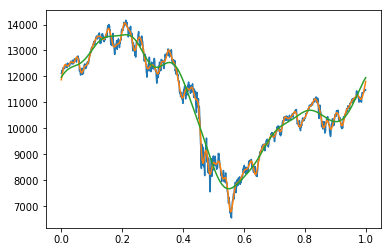

In [130]:
c = npf.rfft(data)
a = np.copy(c)
a[51:] = np.zeros(len(c[51:]))
data2 = npf.irfft(a)
b = np.copy(c)
b[10:] = np.zeros(len(c[10:]))
data3 = npf.irfft(b)
p.plot(x,data)
p.plot(x,data2)
p.plot(x,data3)
p.show()

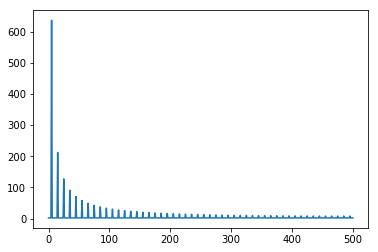

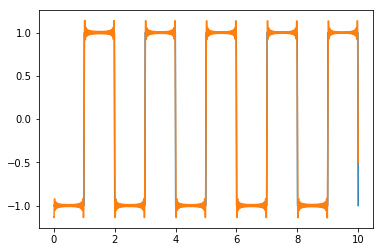

In [34]:
M = 250
x = np.linspace(0,10,1000)
y = (x//1%2 - 0.5)*2
c = npf.rfft(y)
p.plot(np.abs(c))
p.show()
c[M:] = np.copy(np.zeros(len(c[M:])))
z = npf.irfft(c)
p.plot(x,y)
p.plot(x,z)
p.show()

AttributeError: module 'numpy.fft' has no attribute 'gcd'

In [258]:
print(1/2367*10**5)
print(1/3551*10**5)

42.24757076468103
28.161081385525204


In [259]:
1/(84*10**(-5))

1190.4761904761904

In [262]:
44100/1190

37.05882352941177

In [ ]:
def fft1(y):
    N = len(y)
    c = np.zeros(N,complex)
    for k in range(N):
        a = np.copy(y)
        for m in range(int( log(N,2)) -1 , -1 , -1 ):
            b=np.zeros(2**m,complex)
            for i in range(2**m):
                b[i]= a[i] + np.exp(-2j*np.pi*2**m*k/N)*a[i+2**(m)]
            a = np.copy(b)
        c[k] = np.complex(a)  
    return c

In [12]:
def fft2(y):
    N = len(y)
    a = np.copy(y)
    p.plot(np.abs(a),'.')
    p.show()
    for m in range(int( log(N,2)) -1 , -1 , -1 ):
        E = np.zeros(len(y),complex)
        for k in range(int(N/(2**m))):
            for i in range(2**m):
                E[i+k*2**m] = a[i + 2**(m+1) * (k%( int(N/(2**(m+1) )))) ] + a[i + 2**m + 2**(m+1) * (k%(int(N/(2**(m+1) ))))]*np.exp(-2j*(2**m)*np.pi*k/N)
        a = np.copy(E)
        p.plot(np.abs(a),'.')
        p.show()
    return a
            

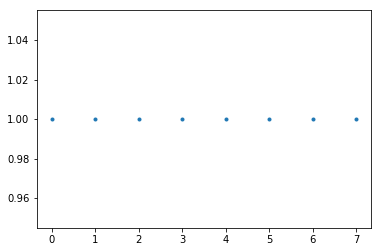

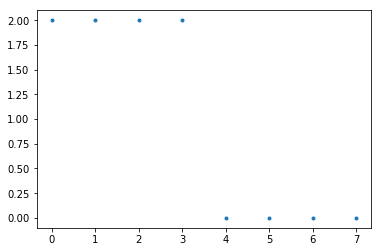

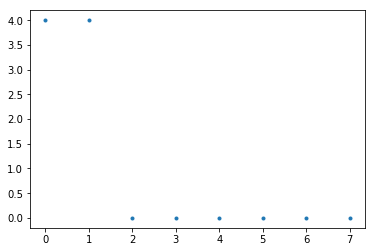

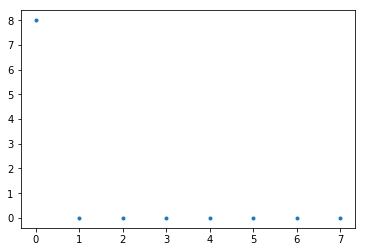

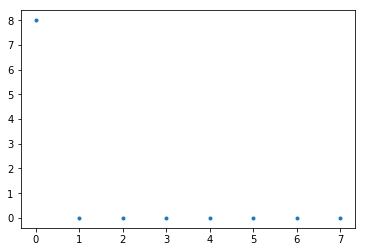

In [13]:
y = np.array([1,1,1,1,1,1,1,1])
p.plot(np.abs(fft2(y)),'.')
p.show()

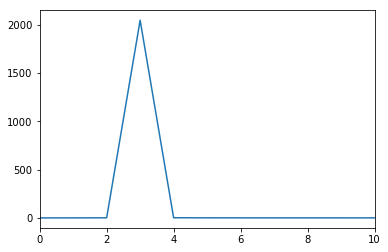

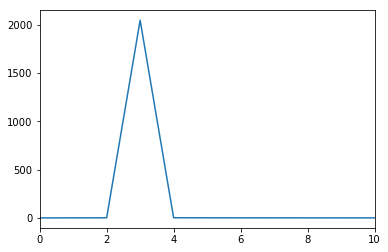

In [111]:
y = np.sin(np.linspace(0,6*np.pi,2**12))
p.plot(np.abs(npf.rfft(y)))
p.xlim(0,10)
p.show()
p.plot(np.abs(fft2(y))[:500])
p.xlim(0,10)
p.show()


In [108]:
2**12

4096